#Handwritten Character Recognition

##importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install extra_keras_datasets
from keras.datasets import mnist
from extra_keras_datasets import emnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_1, y_1), (x_2, y_2) = emnist.load_data(type='letters') 

y_1=y_1+9
y_2=y_2+9

x_train=np.concatenate([x_train,x_1],axis=0)
y_train=np.concatenate([y_train,y_1],axis=0)
x_test=np.concatenate([x_test,x_2],axis=0)
y_test=np.concatenate([y_test,y_2],axis=0)

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step


INFO:root:Loading dataset = emnist


743915520/743900280 [==============================] - 8s 0us/step


(((184800, 28, 28), (184800,)), ((30800, 28, 28), (30800,)))

   label
0      5
1      0
2      4


<BarContainer object of 36 artists>

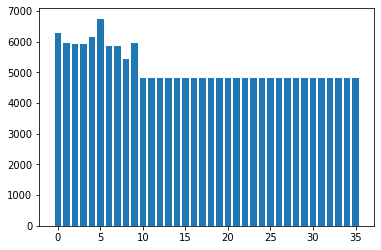

In [ ]:
y=pd.DataFrame(y_train, columns=['label'])
print(y.head(3))
plt.bar(x=y['label'].unique(),height=y.value_counts())

16

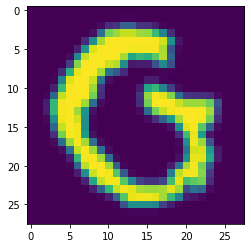

In [ ]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

plt.imshow(x_train[0,:,:])
y_train[0]

In [ ]:
x_train.min(), x_train.max()

(0, 255)

##ml model

In [ ]:
x=x_train.reshape([x_train.shape[0],-1])
x_t=x_test.reshape([x_test.shape[0],-1])

x=x/255.
x_t=x_t/255.

x.shape, x_t.shape

((184800, 784), (30800, 784))

###rfc

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV

grid=RandomForestClassifier(max_depth=100,n_estimators=1000)
#parameters = {'max_depth':[30,40], 'n_estimators':[10,100]}

#grid = GridSearchCV(rfc, param_grid=parameters, cv=5)
grid.fit(x, y_train)

#print("best parameters from train data: ",grid.best_params_)
print("train accuracy",grid.score(x, y_train))
print("test accuracy",grid.score(x_t, y_test))

train accuracy 1.0
test accuracy 0.9136688311688311


In [ ]:
y_pred = grid.predict(x_t)
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[ 965,    0,    0, ...,    0,    0,    0],
       [   0, 1122,    3, ...,    0,    0,    0],
       [   5,    0, 1002, ...,    0,    0,    1],
       ...,
       [   0,    0,    1, ...,  731,   13,    3],
       [   0,    1,    1, ...,    2,  714,    0],
       [   0,    0,    8, ...,    3,    0,  741]])

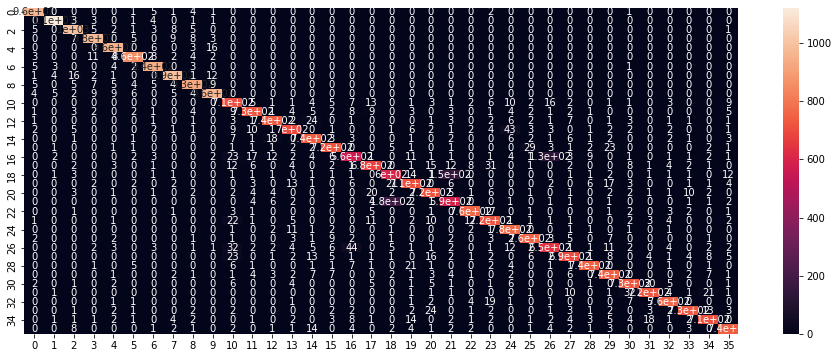

In [ ]:
plt.figure(figsize=[16,6])
ax = sns.heatmap(matrix,annot=True)
plt.show()

###svc

In [8]:
from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV

grid=SVC(kernel='poly',C=0.001,gamma=1)
#parameters = {'C':[0.001,0.1], 'gamma':[1]}

#grid = GridSearchCV(svc, param_grid=parameters, cv=5)
grid.fit(x, y_train)

#print("best parameters from train data: ",grid.best_params_)
print("train accuracy",grid.score(x, y_train))
print("test accuracy",grid.score(x_t, y_test))

train accuracy 0.9966287878787878
test accuracy 0.9254545454545454


In [9]:
y_pred = grid.predict(x_t)
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[ 957,    0,    1, ...,    0,    0,    0],
       [   0, 1114,    3, ...,    0,    1,    0],
       [   8,    0,  993, ...,    0,    0,    8],
       ...,
       [   0,    0,    0, ...,  744,   13,    2],
       [   0,    1,    0, ...,    9,  743,    1],
       [   0,    0,    2, ...,    3,    1,  760]])

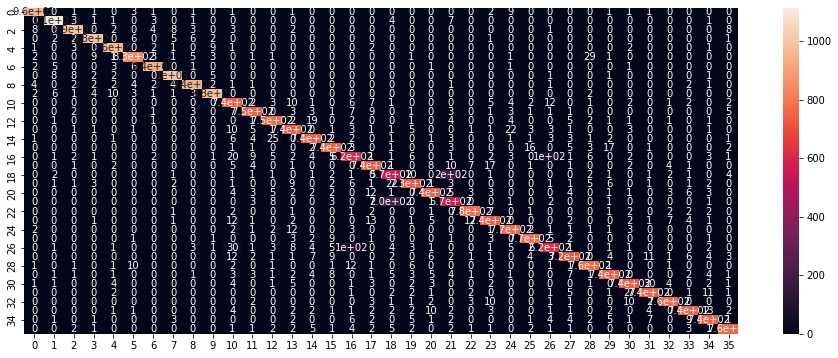

In [10]:
plt.figure(figsize=[16,6])
ax = sns.heatmap(matrix,annot=True)
plt.show()

##model cnn

In [ ]:
x_train=x_train.reshape([-1,28,28,1])
x_test=x_test.reshape([-1,28,28,1])
y_train=y_train.reshape([-1,1])
y_test=y_test.reshape([-1,1])

x_train=x_train/255.0
x_test=x_test/255.0

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((184800, 28, 28, 1), (184800, 1)), ((30800, 28, 28, 1), (30800, 1)))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
y_train=OneHotEncoder().fit_transform(y_train).toarray()
y_test=OneHotEncoder().fit_transform(y_test).toarray()
y_train, y_train.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), (184800, 36))

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras import backend as K

model = Sequential()
model.add(Conv2D(32,kernel_size=(3, 3),activation='relu',input_shape=[28,28,1]))
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2359552   
                                                      

In [ ]:
hist = model.fit(x_train,y_train,batch_size=64,epochs=15,
                 validation_split=0.4)

Epoch 1/15
1733/1733 [==============================] - 25s 14ms/step - loss: 0.6325 - accuracy: 0.8131 - val_loss: 0.2401 - val_accuracy: 0.9238
Epoch 2/15
1733/1733 [==============================] - 24s 14ms/step - loss: 0.3094 - accuracy: 0.9030 - val_loss: 0.1863 - val_accuracy: 0.9385
Epoch 3/15
1733/1733 [==============================] - 24s 14ms/step - loss: 0.2474 - accuracy: 0.9201 - val_loss: 0.1643 - val_accuracy: 0.9464
Epoch 4/15
1733/1733 [==============================] - 24s 14ms/step - loss: 0.2122 - accuracy: 0.9303 - val_loss: 0.1630 - val_accuracy: 0.9473
Epoch 5/15
1733/1733 [==============================] - 23s 13ms/step - loss: 0.1872 - accuracy: 0.9375 - val_loss: 0.1501 - val_accuracy: 0.9504
Epoch 6/15
1733/1733 [==============================] - 23s 13ms/step - loss: 0.1675 - accuracy: 0.9438 - val_loss: 0.1470 - val_accuracy: 0.9517
Epoch 7/15
1733/1733 [==============================] - 23s 13ms/step - loss: 0.1536 - accuracy: 0.9470 - val_loss: 0.1486 -

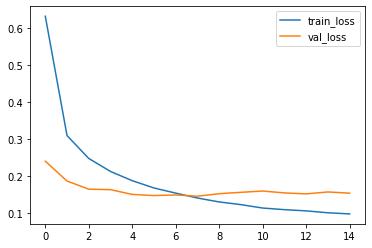

In [ ]:
plt.plot(hist.history['loss'],label='train_loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

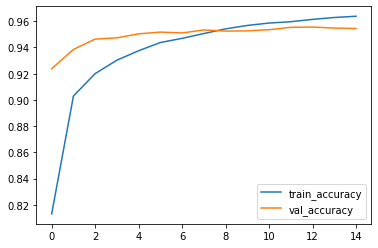

In [ ]:
plt.plot(hist.history['accuracy'],label='train_accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

'test accuracy:',model.evaluate(x_test, y_test)[1]*100,'loss:',model.evaluate(x_test, y_test)[0]

963/963 [==============================] - 5s 5ms/step - loss: 0.1637 - accuracy: 0.9527


('test accuracy:', 95.27272582054138, 'loss:', 0.16372577846050262)

In [ ]:
y_test=np.argmax(y_test,axis=1)
a=confusion_matrix(y_test,y_pred)
a

array([[ 976,    1,    2, ...,    0,    0,    0],
       [   0, 1131,    2, ...,    0,    0,    0],
       [   1,    2, 1022, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,  764,   11,    1],
       [   0,    0,    0, ...,    7,  764,    0],
       [   0,    0,    1, ...,    0,    0,  789]])

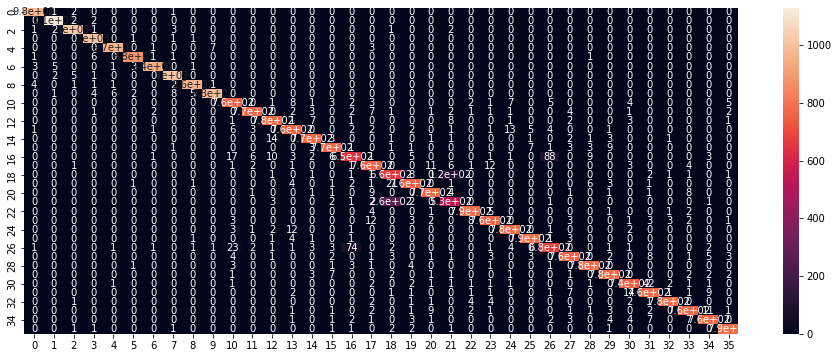

In [ ]:
plt.figure(figsize=[16,6])
ax = sns.heatmap(a,annot=True)
plt.show()